In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import os

In [181]:
file_path = 'headlines/merged_file.csv'
data = pd.read_csv(file_path)

In [182]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/khanhdo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [184]:
def sentiment_catagorize(text):
    ss = sid.polarity_scores(text)
    if ss['compound'] > 0.5:
        return 'Positive'
    elif ss['compound'] < -0.5:
        return 'Negative'
    else:
        return 'Neutral'

In [185]:
data['headline_sentiment'] = data['headline'].apply(sentiment_catagorize)

In [186]:
data.head()

,headline,date,web_url,doc_type,lead_paragraph,material_type,author,section,subsection,keywords,headline_sentiment
0,Kissinger's Nobel Cash Goes to Children of G.I.'s,1973-12-01,https://www.nytimes.com/1973/12/01/archives/ki...,article,"OSLO, Nov. 30 (Reuters)—Secretary of State Kis...",Archives,NaN,Archives,NaN,['Vietnam'],Neutral
1,Notes on People,1973-12-01,https://www.nytimes.com/1973/12/01/archives/a-...,article,"Unassisted except for crutches, Edward M. Kenn...",Archives,Albin Krebs,Archives,NaN,['Vietnam'],Neutral
2,U.S. Plans to Seek New Nuclear Arms In Case Ta...,1973-12-01,https://www.nytimes.com/1973/12/01/archives/us...,article,"WASHINGTON, Nov. 30—Secretary of Defense James...",Archives,By John W. Finney Special to The New York Times,Archives,NaN,['Vietnam'],Negative
3,War Isn't Over For Them—Their Son Must Stay in...,1973-12-02,https://www.nytimes.com/1973/12/02/archives/wa...,article,"SHARON, Vt. — Very few people here have ?? to ...",Archives,By Gloria Emerson Special to The New York Times,Archives,NaN,[],Negative
4,WAR HERO FACES COCAINE CHARGES,1973-12-03,https://www.nytimes.com/1973/12/03/archives/wa...,article,"PETALUMA, Calif., Dec. 2 —“Heroes are just ord...",Archives,NaN,Archives,NaN,['Vietnam'],Neutral


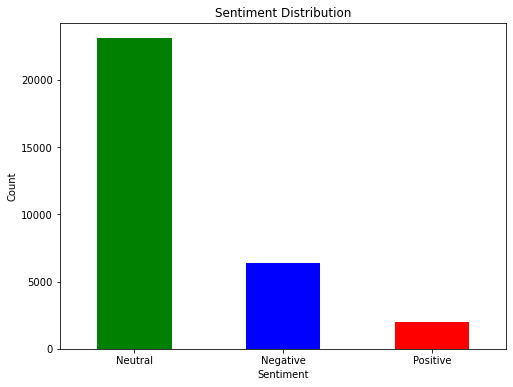

In [187]:
sentiment_counts = data['headline_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [188]:
# Filter the DataFrame where headline_sentiment is 'Positive'
positive_articles = data[data['headline_sentiment'] == 'Positive']

# Count the number of positive articles
num_positive_articles = positive_articles.shape[0]

print(f"Number of articles with positive sentiment: {num_positive_articles}")

# Filter the DataFrame where headline_sentiment is 'Negative'
negative_articles = data[data['headline_sentiment'] == 'Negative']

# Count the number of negative articles
num_negative_articles = negative_articles.shape[0]

print(f"Number of articles with negative sentiment: {num_negative_articles}")

# Filter the DataFrame where headline_sentiment is 'Neutral'
neutral_articles = data[data['headline_sentiment'] == 'Neutral']

# Count the number of neutral articles
num_neutral_articles = neutral_articles.shape[0]

print(f"Number of articles with neutral sentiment: {num_neutral_articles}")

print(len(data['headline']))

Number of articles with positive sentiment: 1965
Number of articles with negative sentiment: 6367
Number of articles with neutral sentiment: 23084
31416


In [189]:
# Function to calculate the percentage of each sentiment
def calculate_sentiment_percentages(dataframe):
    total_count = len(dataframe)
    sentiment_counts = dataframe['headline_sentiment'].value_counts()
    sentiment_percentages = (sentiment_counts / total_count) * 100
    return sentiment_percentages

In [190]:
# Calculate sentiment percentages
sentiment_percentages = calculate_sentiment_percentages(data)

# Print sentiment percentages
print(sentiment_percentages)

Neutral     73.478482
Negative    20.266743
Positive     6.254775
Name: headline_sentiment, dtype: float64


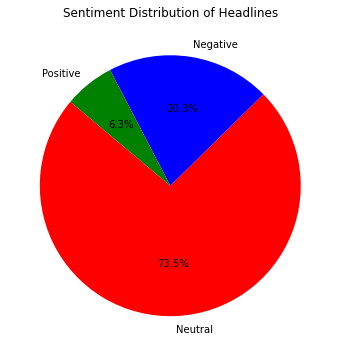

In [191]:
# Plot sentiment percentages as a pie chart
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
sentiment_percentages.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution of Headlines')
plt.ylabel('')  # Hide the y-label
plt.show()

In [192]:
def scale_score(text) :
    ss = sid.polarity_scores(text) # get the dictionary of scores
    score=round((ss['compound']+1)*5,2)   # extract the compound score and scale it
    return score

In [193]:
data['headline_sentiment_score'] = data['headline'].apply(scale_score)

In [194]:
data.head()

,headline,date,web_url,doc_type,lead_paragraph,material_type,author,section,subsection,keywords,headline_sentiment,headline_sentiment_score
0,Kissinger's Nobel Cash Goes to Children of G.I.'s,1973-12-01,https://www.nytimes.com/1973/12/01/archives/ki...,article,"OSLO, Nov. 30 (Reuters)—Secretary of State Kis...",Archives,NaN,Archives,NaN,['Vietnam'],Neutral,5.00
1,Notes on People,1973-12-01,https://www.nytimes.com/1973/12/01/archives/a-...,article,"Unassisted except for crutches, Edward M. Kenn...",Archives,Albin Krebs,Archives,NaN,['Vietnam'],Neutral,5.00
2,U.S. Plans to Seek New Nuclear Arms In Case Ta...,1973-12-01,https://www.nytimes.com/1973/12/01/archives/us...,article,"WASHINGTON, Nov. 30—Secretary of Defense James...",Archives,By John W. Finney Special to The New York Times,Archives,NaN,['Vietnam'],Negative,2.29
3,War Isn't Over For Them—Their Son Must Stay in...,1973-12-02,https://www.nytimes.com/1973/12/02/archives/wa...,article,"SHARON, Vt. — Very few people here have ?? to ...",Archives,By Gloria Emerson Special to The New York Times,Archives,NaN,[],Negative,2.00
4,WAR HERO FACES COCAINE CHARGES,1973-12-03,https://www.nytimes.com/1973/12/03/archives/wa...,article,"PETALUMA, Calif., Dec. 2 —“Heroes are just ord...",Archives,NaN,Archives,NaN,['Vietnam'],Neutral,3.30


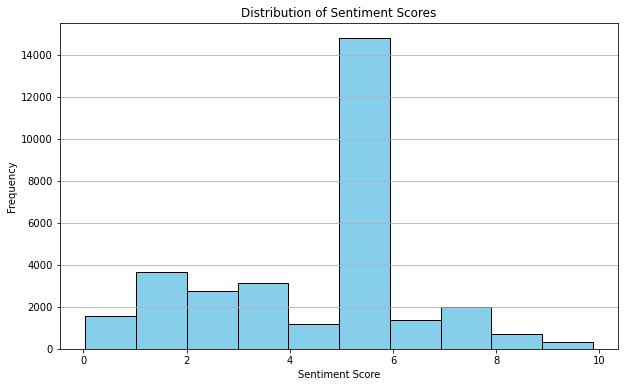

In [195]:
plt.figure(figsize=(10, 6))
plt.hist(data['headline_sentiment_score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [196]:
def average_sentiment_over_period(data):
    average_sentiment = data['headline_sentiment_score'].mean()
    return average_sentiment

print(average_sentiment_over_period(data))

4.349566462948905


In [197]:
data['date'] = pd.to_datetime(data['date'])

sentiment_by_date = data.groupby('date').agg({
    'headline_sentiment_score': 'mean',
}).reset_index()

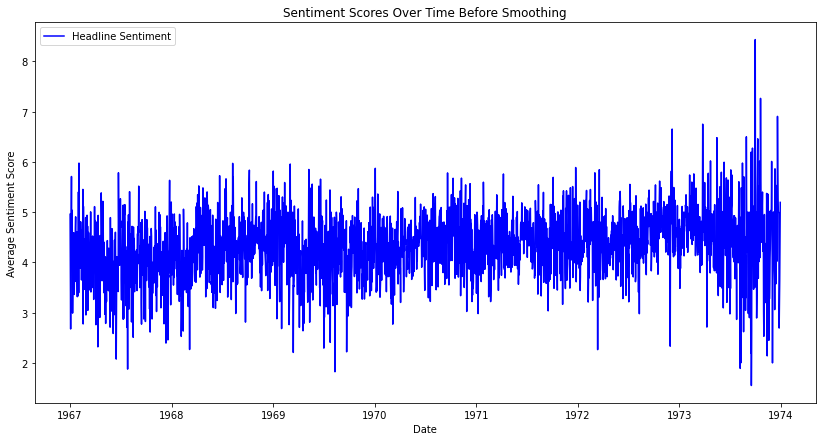

In [199]:
plt.figure(figsize=(14, 7))

# Headline sentiment over time
plt.plot(sentiment_by_date['date'], sentiment_by_date['headline_sentiment_score'], label='Headline Sentiment', color='blue')

plt.title('Sentiment Scores Over Time Before Smoothing')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()

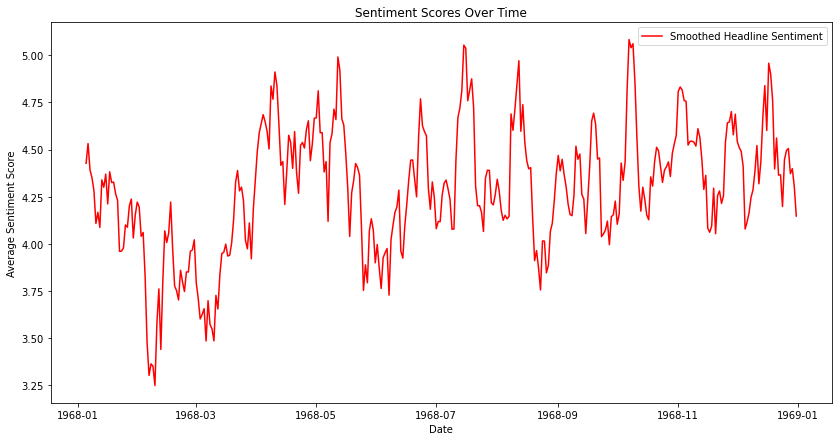

In [20]:
# Apply Low-Pass Filter (Moving Average) for smoothing
window_size = 5  # Adjust the window size for smoothing
sentiment_by_date['smoothed_sentiment'] = sentiment_by_date['headline_sentiment_score'].rolling(window=window_size).mean()

# Plot the sentiment scores over time
plt.figure(figsize=(14, 7))

# Headline sentiment over time
# plt.plot(sentiment_by_date['date'], sentiment_by_date['headline_sentiment_score'], label='Original Headline Sentiment', color='blue', alpha=0.5)
plt.plot(sentiment_by_date['date'], sentiment_by_date['smoothed_sentiment'], label='Smoothed Headline Sentiment', color='red')

plt.title('Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()

In [123]:
import numpy as np

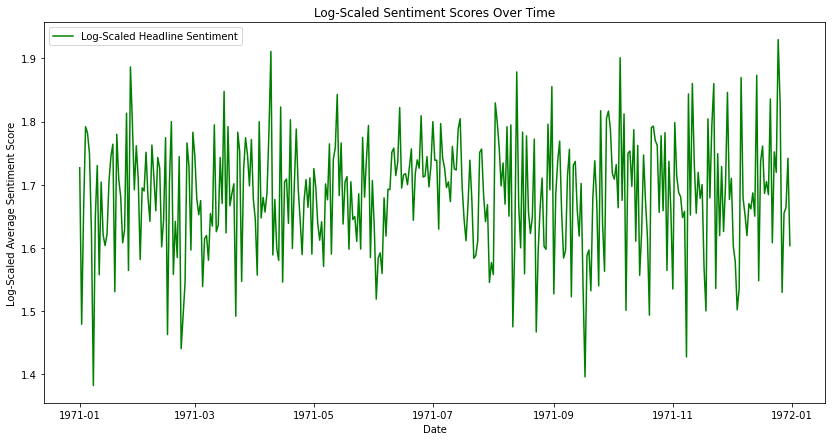

In [215]:
# Apply logarithmic scaling
sentiment_by_date['log_sentiment'] = np.log1p(sentiment_by_date['headline_sentiment_score'])

# Plot the log-scaled sentiment scores over time
plt.figure(figsize=(14, 7))

# Headline sentiment over time
plt.plot(sentiment_by_date['date'], sentiment_by_date['log_sentiment'], label='Log-Scaled Headline Sentiment', color='green')

plt.title('Log-Scaled Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Log-Scaled Average Sentiment Score')
plt.legend()
plt.show()

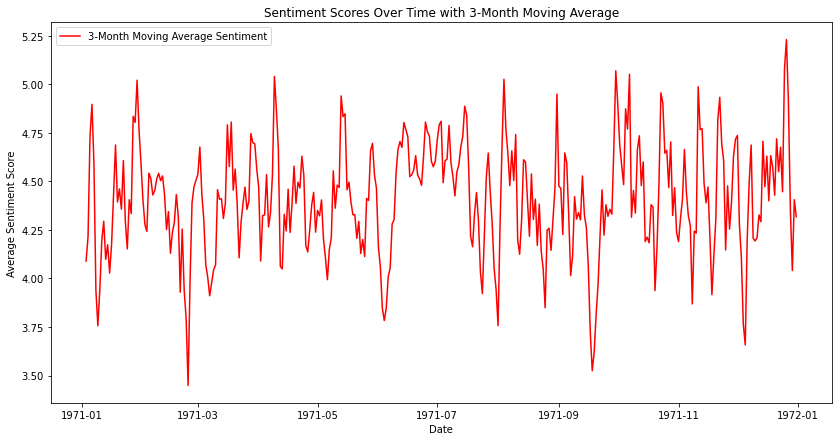

In [216]:
# Calculate 3-month moving average
sentiment_by_date['3_month_moving_avg'] = sentiment_by_date['headline_sentiment_score'].rolling(window=3).mean()

# Plot the sentiment scores with 3-month moving average
plt.figure(figsize=(14, 7))

# Headline sentiment over time
# plt.plot(sentiment_by_date['date'], sentiment_by_date['headline_sentiment_score'], label='Original Headline Sentiment', color='blue', alpha=0.5)
plt.plot(sentiment_by_date['date'], sentiment_by_date['3_month_moving_avg'], label='3-Month Moving Average Sentiment', color='red')

plt.title('Sentiment Scores Over Time with 3-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()

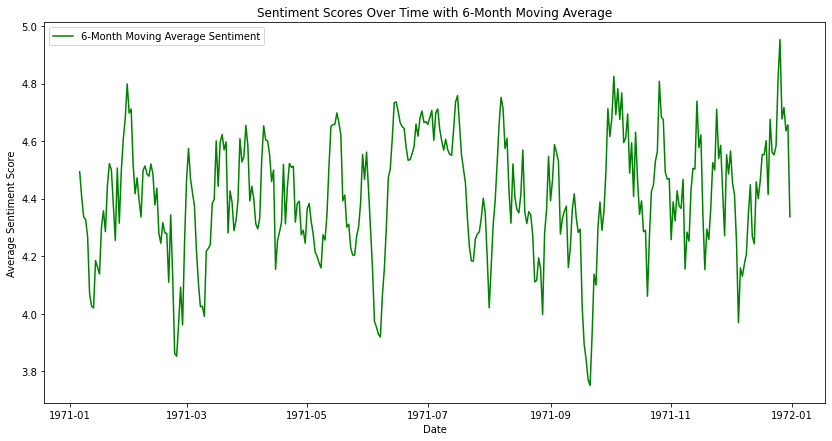

In [217]:
# Calculate 6-month moving average
sentiment_by_date['6_month_moving_avg'] = sentiment_by_date['headline_sentiment_score'].rolling(window=6).mean()

# Plot the sentiment scores with 6-month moving average
plt.figure(figsize=(14, 7))

# Headline sentiment over time
# plt.plot(sentiment_by_date['date'], sentiment_by_date['headline_sentiment_score'], label='Original Headline Sentiment', color='blue', alpha=0.5)
plt.plot(sentiment_by_date['date'], sentiment_by_date['6_month_moving_avg'], label='6-Month Moving Average Sentiment', color='green')

plt.title('Sentiment Scores Over Time with 6-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()

In [127]:
!pip install scipy

In [43]:
from scipy.ndimage import gaussian_filter1d

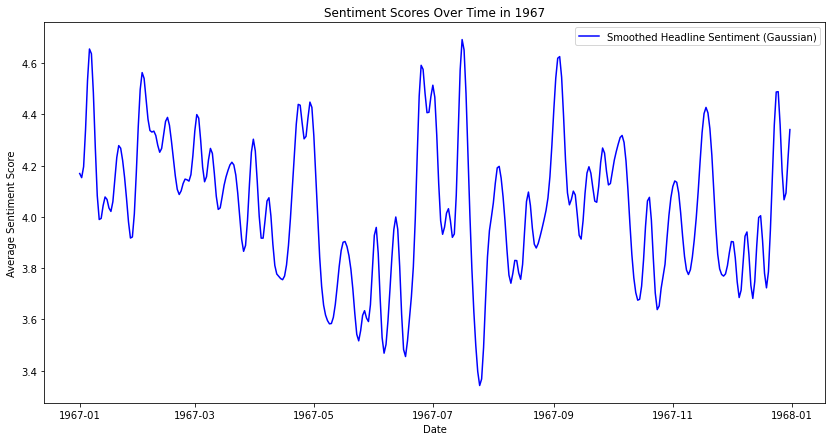

In [169]:
# Apply Gaussian filter for smoothing
sigma = 2  # Standard deviation for Gaussian kernel
sentiment_by_date['smoothed_sentiment'] = gaussian_filter1d(sentiment_by_date['headline_sentiment_score'], sigma=sigma)

# Plot the sentiment scores with Gaussian smoothing
plt.figure(figsize=(14, 7))

# Headline sentiment over time
# plt.plot(sentiment_by_date['date'], sentiment_by_date['headline_sentiment_score'], label='Original Headline Sentiment', color='blue', alpha=0.5)
plt.plot(sentiment_by_date['date'], sentiment_by_date['smoothed_sentiment'], label='Smoothed Headline Sentiment (Gaussian)', color='blue')

plt.title('Sentiment Scores Over Time in 1967')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()